In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train = pd.DataFrame(pd.read_csv("/content/drive/My Drive/Datasets/Stock Prices/Amazon stock prices/AMZNtrain.csv"))

In [4]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [5]:
train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2018-12-24,1346.000000,1396.030029,1307.000000,1343.959961,1343.959961,7220000
1254,2018-12-26,1368.890015,1473.160034,1363.010010,1470.900024,1470.900024,10411800
1255,2018-12-27,1454.199951,1469.000000,1390.310059,1461.640015,1461.640015,9722000
1256,2018-12-28,1473.349976,1513.469971,1449.000000,1478.020020,1478.020020,8829000
1257,2018-12-31,1510.800049,1520.760010,1487.000000,1501.969971,1501.969971,6954500


In [6]:
train.shape

(1258, 7)

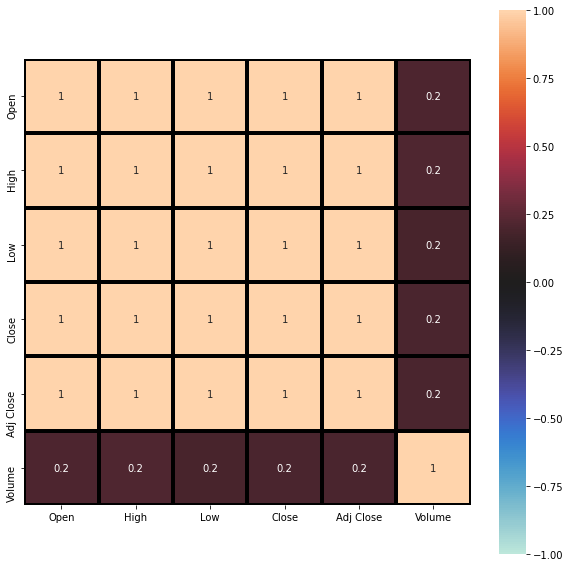

In [7]:
plt.figure(figsize = (10, 10))
sns.heatmap(train.corr(), annot = True, fmt = ".1g", vmin = -1, vmax = 1, center = 0, linewidths = 3, linecolor = "black", square = True)

In [8]:
train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,823.840056,831.762583,814.173943,823.256543,823.256543,4.231814e+06
std,477.931392,482.851261,471.058235,476.952699,476.952699,2.400533e+06
min,284.399994,290.420013,284.000000,286.950012,286.950012,1.093000e+06
25%,393.892494,398.795006,388.427513,394.772492,394.772492,2.713950e+06
50%,726.450012,729.779999,720.079986,727.190002,727.190002,3.582300e+06
75%,1005.860016,1009.742493,997.122513,1002.762496,1002.762496,4.857900e+06
max,2038.109985,2050.500000,2013.000000,2039.510010,2039.510010,2.385610e+07


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


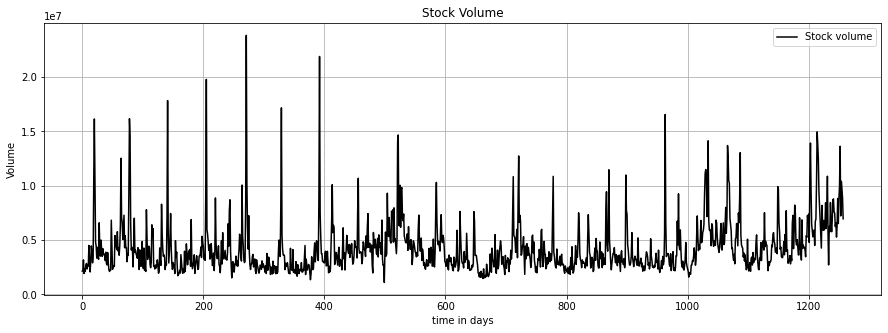

In [10]:
plt.figure(figsize = (15, 5))
plt.subplot(1,1,1)
plt.plot(train.Volume.values, color= "black", label = "Stock volume")
plt.title("Stock Volume")
plt.xlabel("time in days")
plt.ylabel("Volume")
plt.legend(loc = "best")
plt.grid(which = "major", axis = "both")
plt.show()

In [0]:
train.drop(["Open","Date", "Adj Close", "High", "Low", "Close"], axis = 1, inplace = True)

In [12]:
train.shape

(1258, 1)

In [0]:
train = train.values

In [14]:
train

array([[2137800],
       [2210200],
       [3170600],
       ...,
       [9722000],
       [8829000],
       [6954500]])

In [0]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train_scaled = scaler.fit_transform(train)

In [0]:
x_train, y_train = [], []
time_step = 20
for i in range(time_step, train_scaled.shape[0]):
  x_train.append(train_scaled[i-time_step : i , 0])
  y_train.append(train_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [220]:
x_train.shape

(1238, 20)

In [0]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1 ))

In [0]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units = 100, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.LSTM(units = 100, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.LSTM(units = 100, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.LSTM(units = 100, return_sequences = False))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 1))

In [0]:
model.compile(tf.keras.optimizers.Adam(lr = 0.0001), loss = "mean_squared_error")

In [224]:
with tf.device("/device:GPU:0"):
  history = model.fit(x_train, y_train, epochs = 200, batch_size = 16)

Epoch 1/200
78/78 [==============================] - 1s 8ms/step - loss: 0.0142
Epoch 2/200
78/78 [==============================] - 1s 8ms/step - loss: 0.0110
Epoch 3/200
78/78 [==============================] - 1s 8ms/step - loss: 0.0107
Epoch 4/200
78/78 [==============================] - 1s 10ms/step - loss: 0.0111
Epoch 5/200
78/78 [==============================] - 1s 8ms/step - loss: 0.0106
Epoch 6/200
78/78 [==============================] - 1s 8ms/step - loss: 0.0114
Epoch 7/200
78/78 [==============================] - 1s 8ms/step - loss: 0.0106
Epoch 8/200
78/78 [==============================] - 1s 8ms/step - loss: 0.0107
Epoch 9/200
78/78 [==============================] - 1s 8ms/step - loss: 0.0106
Epoch 10/200
78/78 [==============================] - 1s 8ms/step - loss: 0.0109
Epoch 11/200
78/78 [==============================] - 1s 8ms/step - loss: 0.0103
Epoch 12/200
78/78 [==============================] - 1s 8ms/step - loss: 0.0103
Epoch 13/200
78/78 [================

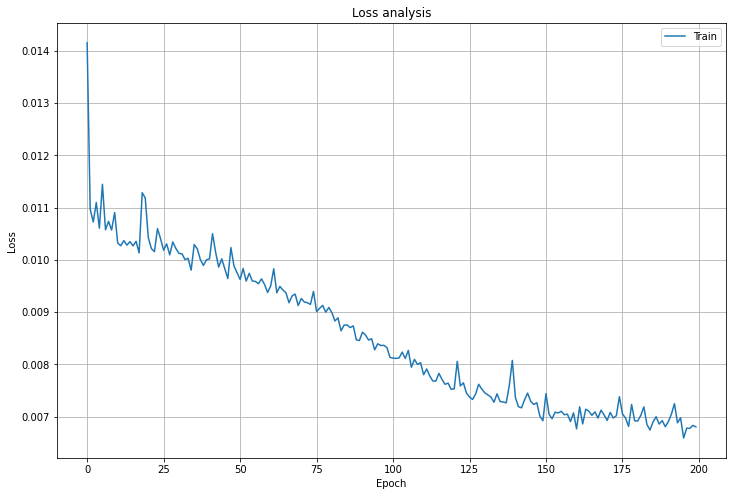

In [225]:
plt.figure(figsize = (12, 8))
plt.plot(history.history["loss"], label = "Training loss")
plt.title("Loss analysis")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train"])
plt.grid("both")

In [0]:
model_json = model.to_json()
with open("amazon_stockVolume_model.json", "w") as json_file:
  json_file.write(model_json)

model.save_weights("amazon_stockVolume_model.h5")

In [0]:
test = pd.DataFrame(pd.read_csv("/content/drive/My Drive/Datasets/Stock Prices/Amazon stock prices/AMZNtest.csv"))
train = pd.DataFrame(pd.read_csv("/content/drive/My Drive/Datasets/Stock Prices/Amazon stock prices/AMZNtrain.csv"))

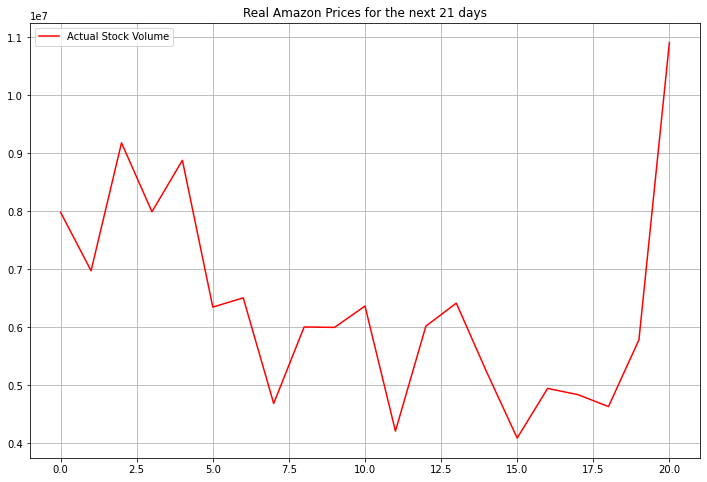

In [228]:
plt.figure(figsize = (12, 8))
plt.subplot(1,1,1)
plt.plot(test.Volume.values, color = "red", label = "Actual Stock Volume")
plt.grid("both")
plt.title("Real Amazon Prices for the next 21 days")
plt.legend()

In [0]:
test.drop(["Open","Date", "Adj Close", "High", "Low", "Close"], axis = 1, inplace = True)
train.drop(["Open","Date", "Adj Close", "High", "Low", "Close"], axis = 1, inplace = True)

In [0]:
real_volume = test.values

In [0]:
dataset_total = pd.concat((train["Volume"], test["Volume"]), axis = 0)

In [0]:
inputs = dataset_total[len(dataset_total) - len(test) - time_step : ].values

In [0]:
inputs = inputs.reshape(-1, 1)

In [0]:
inputs = scaler.fit_transform(inputs)

In [235]:
inputs.shape

(41, 1)

In [0]:
x_test = []
for i in range(time_step, inputs.shape[0]):
  x_test.append(inputs[i - time_step : i , 0])
x_test = np.array(x_test)

In [237]:
x_test.shape

(21, 20)

In [0]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
predicted_volume = model.predict(x_test)

In [0]:
predicted_volume = scaler.inverse_transform(predicted_volume)

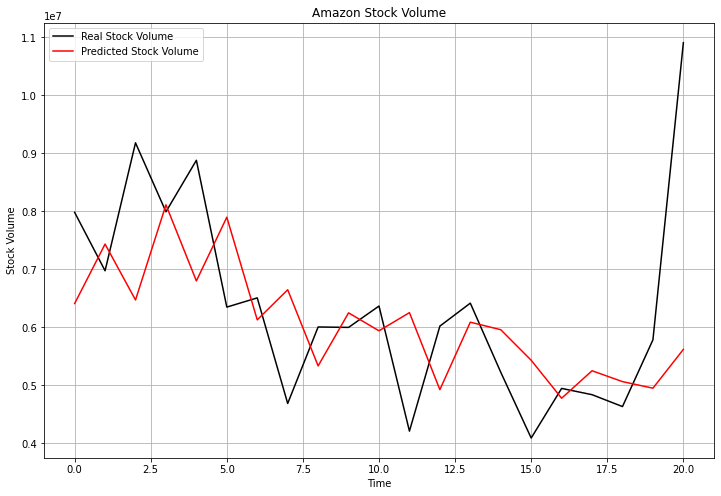

In [241]:
plt.figure(figsize= (12, 8))
plt.subplot(1,1,1)
plt.plot(real_volume, color = "black", label = "Real Stock Volume")
plt.plot(predicted_volume, color = "red", label = "Predicted Stock Volume")
plt.title("Amazon Stock Volume")
plt.xlabel("Time")
plt.ylabel("Stock Volume")
plt.legend()
plt.grid("both")
plt.show()